In this notebook, we delve into the computational techniques for simulating OND systems. Specifically, we looked into Euler's method for numerical integration to approximate the solutions of differential equations that describe the system. 

Here are the visualizations:

1. **Network Node States Over Time**: This heatmap illustrates the states of each node in the network as they evolve over time. The color represents the state value.
  
2. **Observer Node States Over Time**: This heatmap depicts the states of the observer nodes. The observer states tend to follow the node states but may differ based on the differential equations governing them.

The notebook aims to provide a foundational understanding of how computational techniques like Euler's method can be applied to simulate OND systems. This helps in gaining insights into how individual limitations shape collective behaviors over time.

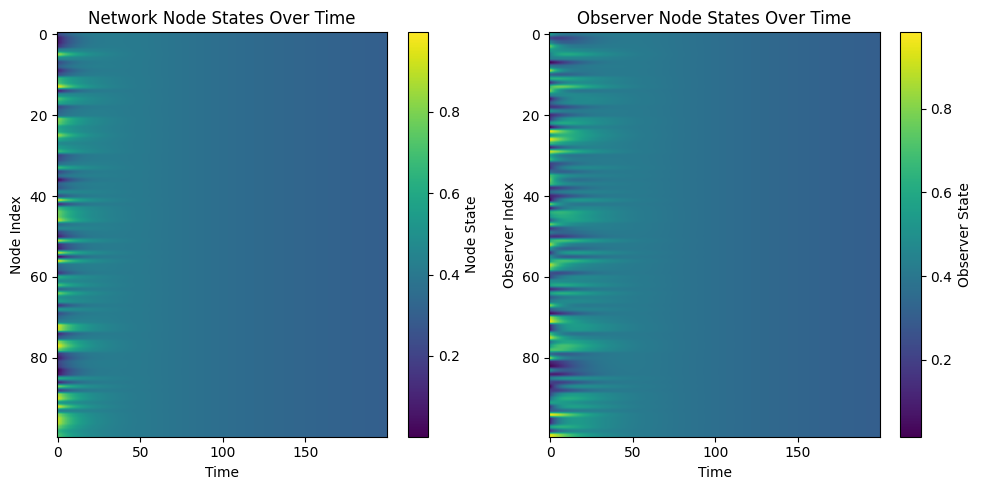

In [1]:
# Importing necessary libraries for simulation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of nodes
T = 200  # Time steps
dt = 0.1  # Time step size

# Initialization
x = np.random.rand(N, T)  # States for all nodes
y = np.random.rand(N, T)  # States for observer nodes (for simplicity, each node is also an observer)

# Function to implement the computational techniques for simulating OND systems
def simulate_ond(x, y, t, dt):
    for i in range(N):
        dx = dt * (-x[i, t-1] + np.sin(np.sum(x[:, t-1]) / N))  # For simplicity, dx/dt = -x + sin(avg(x))
        dy = dt * (x[i, t-1] - y[i, t-1])  # Observer state being pulled towards the node state
        x[i, t] = x[i, t-1] + dx
        y[i, t] = y[i, t-1] + dy

# Simulation loop
for t in range(1, T):
    simulate_ond(x, y, t, dt)

# Visualization
plt.figure(figsize=(10, 5))

# Plot showing the current state of each node
plt.subplot(1, 2, 1)
plt.imshow(x, aspect='auto', cmap='viridis')
plt.title("Network Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Node State")

# Plot showing the current state of each observer node
plt.subplot(1, 2, 2)
plt.imshow(y, aspect='auto', cmap='viridis')
plt.title("Observer Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Observer Index")
plt.colorbar(label="Observer State")

plt.tight_layout()
plt.show()
